# Implementation from Scratch

<br />

I am going to create a class of 3 layers of neural network for multi-class classification.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


### Prepare MNIST Dataset

In [2]:
# Download the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Check the dataset

print(X_train.shape)   # (60000, 28, 28)
print(X_test.shape)   # (10000, 28, 28)
print(X_train[0].dtype)   # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

# Flatten

<br />

I will transform the shape (1, 28, 28) of each image to (1, 784).

In [4]:
# Flatten

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### Visualize the Image Data

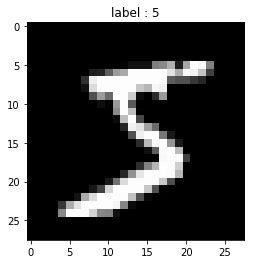

In [5]:
# Plot

index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

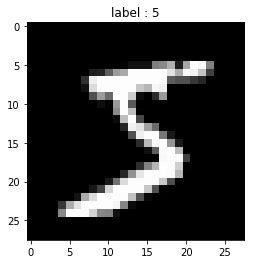

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
# Plot

index = 0
image = X_train[index].reshape(28,28)
# Change it to float
image = image.astype(np.float)
# Create minus fractional value intentionally
image -= 105.35

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

# Check the values
print(image)

### Preprocessing

In [7]:
# Transform unit8 to float

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

print(X_train.max())   # 1.0
print(X_train.min())   # 0.0

1.0
0.0


In [8]:
# One hot encoder

# Initialize
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

# Transform
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

print(y_train.shape)   # (60000,)
print(y_train_one_hot.shape)   # (60000, 10)
print(y_train_one_hot.dtype)   # float64

(60000,)
(60000, 10)
float64


In [9]:
# Split the train dataset

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape)   # (48000, 784)
print(X_val.shape)   # (12000, 784)

(48000, 784)
(12000, 784)


## [Task 1] Create a Class of Neural Network Classifier

### Mini-batch Processing

In [10]:
# Create a class to get a mini-batch

class GetMiniBatch():
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
      Train dataset
    
    y : ndarray, shape (n_samples, 1)
      Correct values
    
    batch_size : int
      Size of batch
    
    seed : int
      Seed of random numbers of Numpy
    """
    
    def __init__(self, X, y, batch_size=10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    
    
    def __len__(self):
        return self._stop
    
    
    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        
        return self.X[p0:p1], self.y[p0:p1]        
    
    
    def __iter__(self):
        self._counter = 0
        
        return self
    
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        
        return self.X[p0:p1], self.y[p0:p1]

### Forwardpropagation

<br />

I am going to create a forwardpropagation method of 3 layers of neural network.

In [11]:
# Create a class of a forwardpropagation method of 3 layers of neural network

class Forwardpropagation():
    """
    Forwardpropagation method
    """
    
    def layer_processing(self, X, W, B):
        """
        Processing of a layer

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature vector

        W : ndarray, shape (n_features, ith n_nodes)
            Weight of ith layer

        B : ndarray, shape (ith n_nodes,)
            Bias of ith layer
        
        
        Returns
        -------
        ndarray, shape (n_samples, ith n_nodes)
            Output
        """
        
        return np.dot(X, W) + B
    
    
    def activation_func(self, A, act_func):
        """
        Activation function
        
        Parameters
        ----------
        A : ndarray, shape (batch_size, ith n_nodes)
            Output
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        # Sigmoid function
        if act_func == "sigmoid":
            return 1 / (1+np.exp(-A))
        
        # tanh
        if act_func == "tanh":
            return np.tanh(A)
    
    
    def softmax_func(self, A3):
        """
        Softmax function
        
        Parameters
        ----------
        A : ndarray, shape (batch_size,)
            Vector from previous layer of kth class
        
        
        Returns
        -------
        ndarray, shape (batch_size,)
            Probability vector of kth class
        """
        
        A3 = A3 - np.max(A3)
        
        return np.exp(A3) / np.sum(np.exp(A3), axis=1)[:,np.newaxis]
    
    
    # Objective function
    def cross_entropy_loss(self, y, X3):
        """
        Cross entropy loss
        
        Parameters
        ----------
        Z : ndarray, shape (batch_size,)
            Probability vector of kth class
        
        
        Returns
        -------
        ndarray, shape ()
            Cross entropy loss
        """
        
        return np.sum(-y * np.log(X3), axis=1)

### Backpropagation

<br />

I am going to create a backpropagation method of 3 layers of neural network.

In [12]:
# Create a class of a backpropagation method of 3 layers of neural network

class Backpropagation():
    """
    Backpropagation method
    """
    
    def third_layer(self, y, X2, X3, W3):
        # Gradient of loss for A3
        delta1 = X3 - y
        # Gradient of loss for B3
        B3_grad = delta1
        # Gradient of loss for W3
        W3_grad = np.dot(X2.T, delta1)
        # Gradient of loss for Z2
        Z2_grad = np.dot(delta1, W3.T)
        
        return delta1, B3_grad, W3_grad, Z2_grad
    
    
    def second_layer(self, X1, A2, W2, W3, delta1, Z2_grad):
        # Gradient of loss for A2
        delta2 = (1-np.tanh(A2)**2) * Z2_grad        
        # Gradient of loss for B2
        B2_grad = delta2
        # Gradient of loss for W2
        W2_grad = np.dot(X1.T, delta2)
        # Gradient of loss for Z1
        Z1_grad = np.dot(delta2, W2.T)
        
        return delta2, B2_grad, W2_grad, Z1_grad
    
    
    def first_layer(self, X, A1, W2, delta2, Z1_grad):
        # Gradient of loss for A1
        delta3 = (1-np.tanh(A1)**2) * Z1_grad
        # Gradient of loss for B1
        B1_grad = delta3
        # Gradient of loss for W1
        W1_grad = np.dot(X.T, delta3)
        
        return delta3, B1_grad, W1_grad

In [15]:
# Create a class of neural network classifier

class ScratchSimpleNeuralNetrowkClassifier():
    """
    Implement simple 3 layers of neural network classifier.
    
    Parameters
    ----------
    num_epoch : int
        Number of epochs
    
    act_func : str
        Name of activation function
        
    lr : float
        Learning rate
    
    n_features : int
        Number of features
    
    n_nodes1 : int
        Number of nodes of 1st layer
    
    n_nodes2 : int
        Number of nodes of 2nd layer
    
    n_output : int
        Number of classes of output (Number of nodes of 3rd layer)
    
    sigma : float
        Standard deviation of Gaussian distribution
    
    verbose : bool
        True if outputting learning process
    
    
    Attributes
    ----------
    loss : ndarray, shape (self.epoch,)
        Records of loss on train dataset
    
    val_loss : ndarray, shape (self.epoch,)
        Records of loss on validation dataset
    
    W1 : ndarray, shape (n_features, n_nodes1)
        Weight of 1st layer
    
    B1 : ndarray, shape (n_nodes1,)
        Bias of 1st layer
    
    W2 : ndarray, shape (n_nodes1, n_nodes2)
        Weight of 2st layer
    
    B2 : ndarray, shape (n_nodes2,)
        Bias of 2st layer
    
    W3 : ndarray, shape (n_nodes2, n_nodes3)
        Weight of 3st layer
    
    B3 : ndarray, shape (n_nodes3,)
        Bias of 3st layer
    """
    
    def __init__(self, num_epoch, batch_size, act_func, lr, n_features, n_nodes1, n_nodes2, n_output, sigma, verbose=True):
        # Record hyperparameters as attribute
        self.epoch = num_epoch
        self.batch_size = batch_size
        self.act_func = act_func
        self.lr = lr
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.epoch)
        self.val_loss = np.zeros(self.epoch)
        
        # Initialize
        fp = Forwardpropagation()
        bp = Backpropagation()
        
        # Get an initial values
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.B1 = sigma * np.random.randn(n_nodes1)[np.newaxis,:]
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.B2 = sigma * np.random.randn(n_nodes2)[np.newaxis,:]
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        self.B3 = sigma * np.random.randn(n_output)[np.newaxis,:]
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of train dataset
        
        y : ndarray, shape (n_samples, )
            Correct values of train dataset
        
        X_val : ndarray, shape (n_samples, n_features)
            Features of validation dataset
        
        y_val : ndarray, shape (n_samples, )
            Correct values of validation dataset
        """
        
        # Initialize
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        if (X_val is not None) and (y_val is not None):
            get_mini_batch_val = GetMiniBatch(X_val, y_val, batch_size=self.batch_size)
        
        # Initialize
        fp = Forwardpropagation()
        bp = Backpropagation()
        
        # Fit
        if self.verbose:
            count = 0
        for i in range(self.epoch):
            if (X_val is not None) and (y_val is not None):
                for ((mini_X_train, mini_y_train), (mini_X_val_train, mini_y_val_train)) in zip(get_mini_batch, get_mini_batch_val):
                    # Forwardpropagation
                    # 1st layer
                    # Processing of the layer
                    A1 = fp.layer_processing(mini_X_train, self.W1, self.B1)
                    # Activation function
                    X1 = fp.activation_func(A1, self.act_func)

                    # 2nd layer
                    # Processing of the layer
                    A2 = fp.layer_processing(X1, self.W2, self.B2)
                    # Activation function
                    X2 = fp.activation_func(A2, self.act_func)

                    # 3rd layer (Softmax)
                    # Processing of the layer
                    A3 = fp.layer_processing(X2, self.W3, self.B3)
                    # Activation function
                    X3 = fp.softmax_func(A3)

                    # 4th layer (Cross entropy loss)
                    if self.verbose:
                        L = fp.cross_entropy_loss(mini_y_train, X3)


                    # Backpropagation
                    # 3rd layer
                    delta1, B3_grad, W3_grad, Z2_grad = bp.third_layer(mini_y_train, X2, X3, self.W3)
                    # Update weight and bias
                    self.B3 = self.B3 - self.lr*np.average(B3_grad, axis=0)
                    self.W3 = self.W3 - self.lr*W3_grad/W3_grad.shape[1]

                    # 2nd layer
                    delta2, B2_grad, W2_grad, Z1_grad = bp.second_layer(X1, A2, self.W2, self.W3, delta1, Z2_grad)
                    # Update weight and bias
                    self.B2 = self.B2 - self.lr*np.average(B2_grad, axis=0)
                    self.W2 = self.W2 - self.lr*W2_grad/W2_grad.shape[1]

                    # 1st layer
                    delta3, B1_grad, W1_grad = bp.first_layer(mini_X_train, A1, self.W2, delta2, Z1_grad)
                    # Update weight and bias
                    self.B1 = self.B1 - self.lr*np.average(B1_grad, axis=0)
                    self.W1 = self.W1 - self.lr*W1_grad/W1_grad.shape[1]
                    
                    
                    # Validation data
                    # Forwardpropagation
                    # 1st layer
                    # Processing of the layer
                    A1 = fp.layer_processing(mini_X_val_train, self.W1, self.B1)
                    # Activation function
                    X1 = fp.activation_func(A1, self.act_func)

                    # 2nd layer
                    # Processing of the layer
                    A2 = fp.layer_processing(X1, self.W2, self.B2)
                    # Activation function
                    X2 = fp.activation_func(A2, self.act_func)

                    # 3rd layer (Softmax)
                    # Processing of the layer
                    A3 = fp.layer_processing(X2, self.W3, self.B3)
                    # Activation function
                    X3 = fp.softmax_func(A3)

                    # 4th layer (Cross entropy loss)
                    if self.verbose:
                        L_val = fp.cross_entropy_loss(mini_y_val_train, X3)
            
            
            else:
                for mini_X_train, mini_y_train in get_mini_batch:
                    # Forwardpropagation
                    # 1st layer
                    # Processing of the layer
                    A1 = fp.layer_processing(mini_X_train, self.W1, self.B1)
                    # Activation function
                    X1 = fp.activation_func(A1, self.act_func)

                    # 2nd layer
                    # Processing of the layer
                    A2 = fp.layer_processing(X1, self.W2, self.B2)
                    # Activation function
                    X2 = fp.activation_func(A2, self.act_func)

                    # 3rd layer (Softmax)
                    # Processing of the layer
                    A3 = fp.layer_processing(X2, self.W3, self.B3)
                    # Activation function
                    X3 = fp.softmax_func(A3)

                    # 4th layer (Cross entropy loss)
                    if self.verbose:
                        L = fp.cross_entropy_loss(mini_y_train, X3)


                    # Backpropagation
                    # 3rd layer
                    delta1, B3_grad, W3_grad, Z2_grad = bp.third_layer(mini_y_train, X2, X3, self.W3)
                    # Update weight and bias
                    self.B3 = self.B3 - self.lr*np.average(B3_grad, axis=0)
                    self.W3 = self.W3 - self.lr*W3_grad/W3_grad.shape[1]

                    # 2nd layer
                    delta2, B2_grad, W2_grad, Z1_grad = bp.second_layer(X1, A2, self.W2, self.W3, delta1, Z2_grad)
                    # Update weight and bias
                    self.B2 = self.B2 - self.lr*np.average(B2_grad, axis=0)
                    self.W2 = self.W2 - self.lr*W2_grad/W2_grad.shape[1]

                    # 1st layer
                    delta3, B1_grad, W1_grad = bp.first_layer(mini_X_train, A1, self.W2, delta2, Z1_grad)
                    # Update weight and bias
                    self.B1 = self.B1 - self.lr*np.average(B1_grad, axis=0)
                    self.W1 = self.W1 - self.lr*W1_grad/W1_grad.shape[1]
            
            
            # Output learning process if verbose is True
            if self.verbose:
                self.loss[count] = sum(L) / self.batch_size
                if (X_val is not None) and (y_val is not None):
                    self.val_loss[count] = sum(L_val) / self.batch_size
                    print("{0}th loss: {1}, val_loss: {2}".format(count+1, self.loss[count], self.val_loss[count]))
                else:
                    print(self.loss[count])
                count += 1
    
    
    def predict(self, X):
        """
        Predict by neural network classifier.
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples
        
        
        Returns
        -------
        ndarray, shape (n_samples, 1)
            Results of prediction
        """
        
        # Initialize
        fp = Forwardpropagation()
        
        # Forwardpropagation
        # 1st layer
        # Processing of the layer
        A1 = fp.layer_processing(X, self.W1, self.B1)
        # Activation function
        X1 = fp.activation_func(A1, self.act_func)

        # 2nd layer
        # Processing of the layer
        A2 = fp.layer_processing(X1, self.W2, self.B2)
        # Activation function
        X2 = fp.activation_func(A2, self.act_func)

        # 3rd layer (Softmax)
        # Processing of the layer
        A3 = fp.layer_processing(X2, self.W3, self.B3)
        # Activation function
        X3 = fp.softmax_func(A3)
        
        return np.argmax(X3, axis=1)
    
    
    # Plot learning records
    def plot_learning_record(self):
        """
        Plot learning records.
        """
        
        plt.figure(facecolor="azure", edgecolor="coral")
        
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Epochs")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()
    
    
    # Compute index values
    def compute_index_values(self, y, y_pred):
        """
        Compute Index values.
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Features of train dataset
        
        y: ndarray, shape(n_samples,)
            Correct values of train dataset
        """
        
        # Return index values
        print("accuracy score:", accuracy_score(y, y_pred))
    
    
    def plot_misclassification(self, X_val, y_val, y_pred):
        """
        Plot results of misclassification. Show "Results of prediction/Corrects" above images.

        Parameters
        ----------
        y_pred : ndarray, shape (n_samples,)
            Results of prediction
        
        y_val : ndarray, shape (n_samples,)
            Correct labels of validation data
        
        X_val : ndarray, shape (n_samples, n_features)
            Features of validation data
        """
        
        # Number of results I want to plot
        num = 36

        true_false = y_pred==y_val
        false_list = np.where(true_false==False)[0].astype(np.int)

        if false_list.shape[0] < num:
            num = false_list.shape[0]
        fig = plt.figure(figsize=(6, 6))
        fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
        for i in range(num):
            ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
            ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
            ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

In [16]:
# Initialize

nn = ScratchSimpleNeuralNetrowkClassifier(100, 10, "tanh", 0.01, 784, 400, 200, 10, 0.01)

In [17]:
# Fit

nn.fit(X_train, y_train, X_val, y_val)

1th loss: 2.305999736287943, val_loss: 2.2876000020287797
2th loss: 2.2951686195910623, val_loss: 2.272890988626444
3th loss: 2.271489353505651, val_loss: 2.2484152264040222
4th loss: 2.2183305820461645, val_loss: 2.192919773931805
5th loss: 2.0866648482492063, val_loss: 2.0516488064396805
6th loss: 1.8075162974950154, val_loss: 1.7759673026857417
7th loss: 1.4538308371338493, val_loss: 1.5259884617736603
8th loss: 1.1463938493155195, val_loss: 1.4079417741717983
9th loss: 0.9280653407589428, val_loss: 1.383188233596287
10th loss: 0.7833389878372976, val_loss: 1.3934201915300806
11th loss: 0.6814492519911003, val_loss: 1.4058970360940883
12th loss: 0.6025347252438547, val_loss: 1.4102843309418214
13th loss: 0.5369169011670648, val_loss: 1.4067933185048982
14th loss: 0.4805365677263119, val_loss: 1.3989683554252121
15th loss: 0.4319408869183697, val_loss: 1.3901681366358098
16th loss: 0.39059401212886014, val_loss: 1.3823750855264962
17th loss: 0.35598454382355593, val_loss: 1.376307844

In [18]:
# Predict

y_pred = nn.predict(X_test)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

# Validation

## [Task 2] Plot Learning Curves

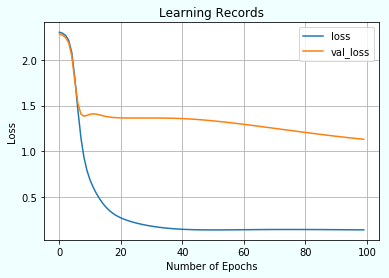

In [20]:
# Plot

nn.plot_learning_record()

## [Task 3] Compute Evaluation Indices

In [21]:
nn.compute_index_values(y_test, y_pred)

accuracy score: 0.9142


## [Option] Check Misclassification

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:347: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


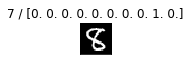

In [22]:
nn.plot_misclassification(X_val, y_val, y_pred)